In [2]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [3]:
df = pd.read_csv(
    "./datas/movielens-1m/ratings.dat",
    header=None,
    names="UserID::MovieID::Rating::Timestamp".split("::"),
    sep="::",
    engine="python"
)

In [4]:
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df['pdate'] = pd.to_datetime(df['Timestamp'], unit = 's')

In [9]:
df.head()

,UserID,MovieID,Rating,Timestamp,pdate
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [13]:
df_group = df.groupby([df['pdate'].dt.month, 'Rating'])['UserID'].agg(pv = np.size)

In [11]:
df_group.head(20)

pv
pdate Rating      
1     1       1127
      2       2608
      3       6442
      4       8400
      5       4495
2     1        629
      2       1464
      3       3297
      4       4403
      5       2335
3     1        466
      2       1077
      3       2523
      4       3032
      5       1439
4     1       1048
      2       2247
      3       5501
      4       6748
      5       3863

In [14]:
df_stack = df_group.unstack()

In [15]:
df_stack

pv                             
Rating      1      2      3       4      5
pdate                                     
1        1127   2608   6442    8400   4495
2         629   1464   3297    4403   2335
3         466   1077   2523    3032   1439
4        1048   2247   5501    6748   3863
5        4557   7631  18481   25769  17840
6        3196   6500  15211   21838  14365
7        4891   9566  25421   34957  22169
8       10873  20597  50509   64198  42497
9        3107   5873  14702   19927  13182
10       2121   4785  12175   16095  10324
11      17701  32202  76069  102448  67041
12       6458  13007  30866   41156  26760

<AxesSubplot:xlabel='pdate'>

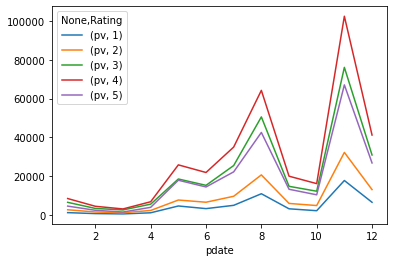

In [16]:
df_stack.plot()

In [17]:
df_group.head()

pv
pdate Rating      
1     1       1127
      2       2608
      3       6442
      4       8400
      5       4495

In [18]:
df_reset = df_group.reset_index()

In [19]:
df_reset.head()

,pdate,Rating,pv
0,1,1,1127
1,1,2,2608
2,1,3,6442
3,1,4,8400
4,1,5,4495


In [20]:
df_pivot = df_reset.pivot('pdate', 'Rating', 'pv')

In [21]:
df_pivot.head()

Rating,1,2,3,4,5
pdate,,,,,
1,1127,2608,6442,8400,4495
2,629,1464,3297,4403,2335
3,466,1077,2523,3032,1439
4,1048,2247,5501,6748,3863
5,4557,7631,18481,25769,17840


<AxesSubplot:xlabel='pdate'>

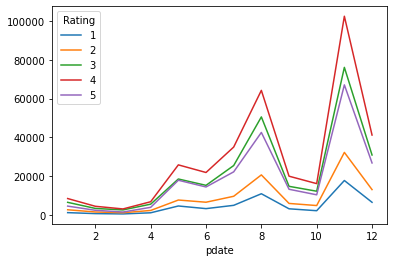

In [22]:
df_pivot.plot()

## ***pivot相当于对df使用set_index创建分层索引，然后调用unstack***